<a href="https://colab.research.google.com/github/RubenMcCarty/Data_AI_Architect/blob/main/ExamenFinal_Data_Mesh_AppJedi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen Final de Big Data Architect "DATA MESH for AppJedi"**

## Autor: [Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

# Objetivo:
* Dibujar la Arquitectura de Datos de AppJedi de cada una de las unidades de la corporación Star Wars

* Datos a considerar para resolver el caso:
1. Star Wars es una corporación que tiene presencia en 25 países del mundo y cada empresa tendrá 4 unidades de negocios  hiper autónomas
2. AppJedi es una aplicación que permite denunciar casos de corrupción del país, el denunciante recibirá recompensas por la
calidad y cantidad de denuncias
3. Por aspectos de regulación cada país no podrá compartir infraestructura y recursos humanos para implementar sus  soluciones de data & Analytics
4. Tomar como base la arquitectura descentralizada Lake House de la clase
5. Cada país utilizará 1  solo vendor Cloud de los 3 posibles (AWS, GCP, Azure)


Entregable:
* Link del programa Python en Colab que genera los diagramas de arquitectura
* Imagen o PDF del resultado del programa en Colab
* Cada diagrama llevará como título “Arquitectura Data Mesh “ @Unidad, @País
* (opcional) Nombrar cada componente del diagrama según el vendor Cloud

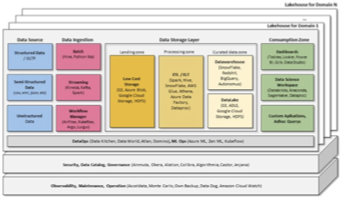

In [1]:
# Instalamos la librería Diagrams
# Fuente: https://diagrams.mingrammer.com/
!pip install diagrams
!pip install diagrams graphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 69.1 MB/s eta 0:00:00


In [2]:
# Importamos el módulo maestro Diagram
from diagrams import Diagram
# Vendor AWS
from diagrams.aws.compute import EC2
# Vendor Azure
from diagrams.azure.storage import BlobStorage
# Vendor Google
from diagrams.gcp.analytics import BigQuery

# Arquitecturas para un dominio y para un Pais

In [ ]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("LakeHouse for Domain 1", show=False):

    with Cluster("Data Source"):
        source = [ECS("Structured Data\nOLTP"),
                  ECS("Semi-Structured Data\n(csv,xml,json,etc)"),
                  ECS("Unstructured\nData")]

    with Cluster("Data Ingestion"):
        ingest = [ECS("Batch\n(Hive, Python libs)"),
                  ECS("Streaming\n(kinesis, kafka,\nSprak)"),
                  ECS("Workflow\nManager\n(Airflow, kubeflow,\nArgo, Luigui)")]

    with Cluster("Data Storage Layer"):
        with Cluster("Landing Zone"):
            workers = [S3("Low Cost\nStorage\n(S3, Azure Blob,\nGoogle Cloud\nStorage, HDFS)")]

        with Cluster("Processing Zone"):
            handlers = [Lambda("ETL/ELT\n(Spark, Hive,\nSnowFlake, AWS\nGlue, Athena,\nAzure Data\nFactory,\nDataproc)")]

        with Cluster("Curated Data Zone"):
            curated = [Redshift("Datawarehouse\n(Snowflake,\nRedshift,\nBigQuery,\nAutonomous)"),
                       S3("DataLake\n(S3, ADLS,\nGoogle Cloud\nStorage, HDFS)")]

        with Cluster("Consumption Zone"):
            zone = [ECS("Dashboard\n(Tableau, Looker,\nPower BI, Qlik, Data Studio)"),
                   ECS("Data Science\nWorkspace\n(Databricks, Anaconda,\nSagemaker, DataProc)"),
                   ECS("Custom Application\nAdhoc Queries")]

        source >> ingest >> curated
        workers >> handlers >> curated
        curated >> zone


TypeError: ignored

# Arquitectura para 25 paises con 4 dominios por pais

In [3]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

import itertools

countries = ["Peru", "Brazil", "Argentina", "Colombia", "Chile", "Mexico",
             "United States", "Canada", "United Kingdom", "Germany", "France",
             "Italy", "Spain", "Russia", "China", "Japan", "India", "Australia",
             "South Africa", "Nigeria", "Egypt", "Saudi Arabia", "United Arab Emirates",
             "South Korea", "Indonesia", "Thailand"]
domains = ["com", "net", "org", "edu"]

# Generate a list of all country-domain combinations
country_domain_combinations = list(itertools.product(countries, domains))

# Generate a diagram for each country-domain combination
for country, domain in country_domain_combinations:
    diagram_name = f"LakeHouse for Domain {domain} in {country}"

    with Diagram(diagram_name, show=False):

        with Cluster("Data Source"):
            source = [ECS("Structured Data\nOLTP"),
                      ECS("Semi-Structured Data\n(csv,xml,json,etc)"),
                      ECS("Unstructured\nData")]

        with Cluster("Data Ingestion"):
            ingest = [ECS("Batch\n(Hive, Python libs)"),
                      ECS("Streaming\n(kinesis, kafka,\nSprak)"),
                      ECS("Workflow\nManager\n(Airflow, kubeflow,\nArgo, Luigui)")]

        with Cluster("Data Storage Layer"):
            with Cluster("Landing Zone"):
                workers = [S3("Low Cost\nStorage\n(S3, Azure Blob,\nGoogle Cloud\nStorage, HDFS)")]

            with Cluster("Processing Zone"):
                handlers = [Lambda("ETL/ELT\n(Spark, Hive,\nSnowFlake, AWS\nGlue, Athena,\nAzure Data\nFactory,\nDataproc)")]

            with Cluster("Curated Data Zone"):
                curated = [Redshift("Datawarehouse\n(Snowflake,\nRedshift,\nBigQuery,\nAutonomous)"),
                           S3("DataLake\n(S3, ADLS,\nGoogle Cloud\nStorage, HDFS)")]

            with Cluster("Consumption Zone"):
                zone = [ECS("Dashboard\n(Tableau, Looker,\nPower BI, Qlik, Data Studio)"),
                       ECS("Data Science\nWorkspace\n(Databricks, Anaconda,\nSagemaker, DataProc)"),
                       ECS("Custom Application\nAdhoc Queries")]

        source >> ingest >> curated
        workers >> handlers >> curated
        curated >> zone

    # Save the diagram to a file
    diagram.render(f"diagrams/{diagram_name}.png")

TypeError: ignored

# otro metodo

In [59]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("LakeHouse for Domain 1", show=False):

    with Cluster("Data Source"):
        source = [ECS("Structured Data\nOLTP"),
                  ECS("Semi-Structured Data\n(csv,xml,json,etc)"),
                  ECS("Unstructured\nData")]

    with Cluster("Data Ingestion"):
        ingest = [ECS("Batch\n(Hive, Python libs)"),
                  ECS("Streaming\n(kinesis, kafka,\nSprak)"),
                  ECS("Workflow\nManager\n(Airflow, kubeflow,\nArgo, Luigui)")]

    with Cluster("Data Storage Layer"):
        with Cluster("Landing Zone"):
            workers = [S3("Low Cost\nStorage\n(S3, Azure Blob,\nGoogle Cloud\nStorage, HDFS)")]

        with Cluster("Processing Zone"):
            handlers = [Lambda("ETL/ELT\n(Spark, Hive,\nSnowFlake, AWS\nGlue, Athena,\nAzure Data\nFactory,\nDataproc)")]

        with Cluster("Curated Data Zone"):
            curated = [Redshift("Datawarehouse\n(Snowflake,\nRedshift,\nBigQuery,\nAutonomous)"),
                       S3("DataLake\n(S3, ADLS,\nGoogle Cloud\nStorage, HDFS)")]

        with Cluster("Consumption Zone"):
            zone = [ECS("Dashboard\n(Tableau, Looker,\nPower BI, Qlik, Data Studio)"),
                   ECS("Data Science\nWorkspace\n(Databricks, Anaconda,\nSagemaker, DataProc)"),
                   ECS("Custom Application\nAdhoc Queries")]

    source - ingest - curated
    workers - handlers - curated
    curated - zone

TypeError: ignored

# Otro metodo

In [4]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import ElastiCache, RDS
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53

# Define a function to generate a diagram for a given country and domain
def generate_diagram(country, domain):
    with Diagram(f"{country} - {domain}", show=False):
        dns = Route53(f"dns-{domain}")
        lb = ELB(f"lb-{domain}")

        with Cluster("Services"):
            svc_group = [ECS(f"web1-{domain}"),
                        ECS(f"web2-{domain}"),
                        ECS(f"web3-{domain}")]

        with Cluster("DB Cluster"):
            db_primary = RDS(f"userdb-{domain}")
            db_primary - [RDS(f"userdb ro-{domain}")]

        memcached = ElastiCache(f"memcached-{domain}")

        dns >> lb >> svc_group
        svc_group >> db_primary
        svc_group >> memcached

# Create a list of all countries and domains
countries = ["Peru", "Brazil", "Argentina", "Colombia", "Chile", "Mexico",
             "United States", "Canada", "United Kingdom", "Germany", "France",
             "Italy", "Spain", "Russia", "China", "Japan", "India", "Australia",
             "South Africa", "Nigeria", "Egypt", "Saudi Arabia", "United Arab Emirates",
             "South Korea", "Indonesia", "Thailand"]
domains = ["com", "net", "org", "edu"]

# Generate a diagram for each country and domain
for country in countries:
    for domain in domains:
        generate_diagram(country, domain)

# Save all diagrams to a directory
import os
if not os.path.exists("diagrams"):
    os.makedirs("diagrams")

for diagram in Diagram.list_diagrams():
    diagram.render("diagrams/" + diagram.name + ".png")


AttributeError: ignored

In [ ]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Data Storage Layer", show=False):
    source = EKS("Landing Zone"):



    with Cluster("Processing Zone"):
      workers = [ECS("ETL/ELT\n(Spark, Hive,\nSnowFlake, AWS\nGlue, Athena,\nAzure Data\nFactory,\nDataproc)")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

SyntaxError: ignored